# **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import brentq, minimize
from scipy.optimize import fsolve
from scipy.stats import norm
from datetime import datetime
from scipy.interpolate import interp1d

import matplotlib.pyplot as plt

# **Data Pre-Processing**

In [ ]:
mrna = pd.read_excel("MRNA.xlsx",)
mrna["Date"] = pd.to_datetime(mrna["Date"], format="%d/%m/%Y")
mrna['Price'] = mrna['Close']
mrna = mrna[['Date', 'Price']]
mrna = mrna.sort_values(by = 'Date')
mrna = mrna.reset_index(drop = True)
print("The data of MRNA stocks:")
print(mrna)

The data of MRNA stocks:
          Date   Price
0   2021-03-09  130.87
1   2021-03-10  129.75
2   2021-03-11  140.47
3   2021-03-12  136.99
4   2021-03-15  143.66
..         ...     ...
500 2023-03-03  143.20
501 2023-03-06  144.03
502 2023-03-07  141.05
503 2023-03-08  142.08
504 2023-03-09  137.36

[505 rows x 2 columns]


In [ ]:
sp500 = pd.read_excel("SP500.xlsx", skiprows=2)
sp500["Date"] = pd.to_datetime(sp500["Date"], format="%b %d, %Y")
sp500['Price'] = sp500['Close*']    # Do not remove the "*"
sp500 = sp500[['Date', 'Price']]
sp500 = sp500.sort_values(by = 'Date')
sp500 = sp500.reset_index(drop = True)
print("The data of SP500 Index:")
print(sp500)

The data of SP500 Index:
          Date    Price
0   2021-03-09  3875.44
1   2021-03-10  3898.81
2   2021-03-11  3939.34
3   2021-03-12  3943.34
4   2021-03-15  3968.94
..         ...      ...
499 2023-03-02  3981.35
500 2023-03-03  4045.64
501 2023-03-06  4048.42
502 2023-03-07  3986.37
503 2023-03-08  3992.01

[504 rows x 2 columns]


In [ ]:
# Import and clean data of MRNA options
mrna_quote = pd.read_excel("mrna_quotedata20220309.xlsx")
mrna_quote["Expiration Date"] = pd.to_datetime(mrna_quote["Expiration Date"], format = "%a %b %d %Y")

list_date = mrna_quote['Expiration Date'].unique()

delete_index_list = []

for t in list_date:

  subset = mrna_quote[(mrna_quote['Expiration Date'] == t)]

  if len(subset) > 1:
      list_strike = subset['Strike'].unique()

      for s in list_strike:
        subset2 = subset[(subset['Strike'] == s)]
        if len(subset2) > 1:
          max_bid_c = subset2['Bid'].max()
          max_bid_p = subset2['Bid.1'].max()
          min_ask_c = subset2['Ask'].min()
          min_ask_p = subset2['Ask.1'].min()

          list_index = subset2.index
          mrna_quote.loc[list_index[0], 'Bid'] = max_bid_c
          mrna_quote.loc[list_index[0], 'Bid.1'] = max_bid_p
          mrna_quote.loc[list_index[0], 'Ask'] = min_ask_c
          mrna_quote.loc[list_index[0], 'Ask.1'] = min_ask_p

          delete_index_list.extend(list_index[1:])

mrna_quote = mrna_quote.drop(delete_index_list)

mrna_quote['Call Price'] = (mrna_quote['Ask'] + mrna_quote['Bid']) / 2
mrna_quote['Put Price'] = (mrna_quote['Ask.1'] + mrna_quote['Bid.1']) / 2

mrna_quote['Call Volume'] = mrna_quote['Volume']
mrna_quote['Put Volume'] = mrna_quote['Volume.1']

mrna_quote = mrna_quote[['Expiration Date', 'Call Price', 'Put Price', 'Strike', 'Call Volume', 'Put Volume']]
mrna_quote = mrna_quote.sort_values(by = 'Expiration Date')
mrna_quote = mrna_quote.reset_index(drop = True)

print("The data of MRNA options:")
mrna_quote.head()

The data of MRNA options:


,Expiration Date,Call Price,Put Price,Strike,Call Volume,Put Volume
0,2022-03-11,67.70,0.005,75.0,0,54
1,2022-03-11,0.71,12.500,155.0,712,7
2,2022-03-11,1.07,11.125,152.5,1783,1
3,2022-03-11,1.31,10.850,150.0,5541,250
4,2022-03-11,2.34,8.500,149.0,295,11


In [ ]:
# Import and clean data of SP500 options
sp500_quote = pd.read_excel("spx_quotedata20220309_all.xlsx")
sp500_quote["Expiration Date"] = pd.to_datetime(sp500_quote["Expiration Date"], format = "%a %b %d %Y")

list_date = sp500_quote['Expiration Date'].unique()

delete_index_list = []

for t in list_date:

  subset = sp500_quote[(sp500_quote['Expiration Date'] == t)]

  if len(subset) > 1:
      list_strike = subset['Strike'].unique()

      for s in list_strike:
        subset2 = subset[(subset['Strike'] == s)]
        if len(subset2) > 1:
          max_bid_c = subset2['Bid'].max()
          max_bid_p = subset2['Bid.1'].max()
          min_ask_c = subset2['Ask'].min()
          min_ask_p = subset2['Ask.1'].min()

          list_index = subset2.index
          sp500_quote.loc[list_index[0], 'Bid'] = max_bid_c
          sp500_quote.loc[list_index[0], 'Bid.1'] = max_bid_p
          sp500_quote.loc[list_index[0], 'Ask'] = min_ask_c
          sp500_quote.loc[list_index[0], 'Ask.1'] = min_ask_p

          delete_index_list.extend(list_index[1:])

sp500_quote = sp500_quote.drop(delete_index_list)

sp500_quote['Call Price'] = (sp500_quote['Ask'] + sp500_quote['Bid']) / 2
sp500_quote['Put Price'] = (sp500_quote['Ask.1'] + sp500_quote['Bid.1']) / 2

sp500_quote['Call Volume'] = sp500_quote['Volume']
sp500_quote['Put Volume'] = sp500_quote['Volume.1']

sp500_quote = sp500_quote[['Expiration Date', 'Call Price', 'Put Price', 'Strike', 'Call Volume', 'Put Volume']]
sp500_quote = sp500_quote.sort_values(by = 'Expiration Date')
sp500_quote = sp500_quote.reset_index(drop = True)

print("The data of SP500 options:")
sp500_quote.head()

The data of SP500 options:


,Expiration Date,Call Price,Put Price,Strike,Call Volume,Put Volume
0,2022-03-09,875.800,0.025,3400,0,1
1,2022-03-09,0.025,117.100,4395,332,2
2,2022-03-09,0.025,124.600,4400,2209,56
3,2022-03-09,0.025,129.600,4405,369,17
4,2022-03-09,0.025,134.600,4410,1287,15


# **Task 1**

In [ ]:
display(sp500_quote)

,Expiration Date,Call Price,Put Price,Strike,Call Volume,Put Volume
0,2022-03-09,875.800,0.025,3400,0,1
1,2022-03-09,0.025,117.100,4395,332,2
2,2022-03-09,0.025,124.600,4400,2209,56
3,2022-03-09,0.025,129.600,4405,369,17
4,2022-03-09,0.025,134.600,4410,1287,15
...,...,...,...,...,...,...
4503,2025-12-19,3913.400,3.400,200,0,1
4504,2025-12-19,2341.400,95.300,2000,0,10
4505,2025-12-19,2178.400,117.550,2200,0,10
4506,2025-12-19,801.450,595.000,4200,0,50


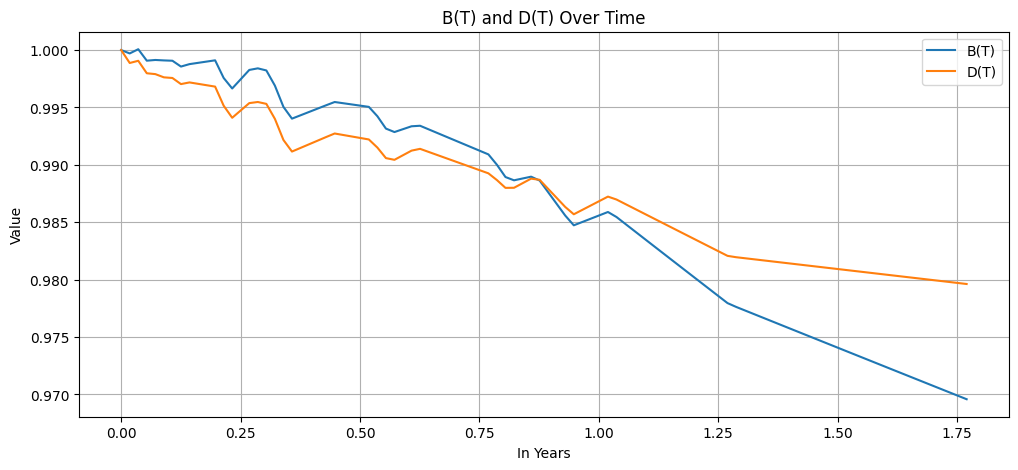

In [ ]:
today = pd.to_datetime("2022-03-09")

def Task_1():
  list_date = sp500_quote[sp500_quote['Expiration Date'] > today + pd.DateOffset(days=6)]["Expiration Date"].unique()
  list_valid_date = []
  for date in list_date:
    option_temp = sp500_quote[(sp500_quote["Expiration Date"] == date) & (sp500_quote["Call Volume"] >0) & (sp500_quote["Put Volume"] > 0)]
    if len(option_temp) > 1:
      list_valid_date.append(date)
  D = []
  B = []
  S_0 = sp500[sp500['Date'] == today]['Price'].values[0]

  def target(x, call, put, K):
    D, B = x
    error = D*S_0 - K*B - (call - put)
    return np.sum(error**2)

  for date in list_valid_date:
    option_temp = sp500_quote[(sp500_quote["Expiration Date"] == date) & (sp500_quote["Call Volume"] >0) & (sp500_quote["Put Volume"] > 0)]
    K = option_temp["Strike"].to_numpy()
    call = option_temp["Call Price"].to_numpy()
    put = option_temp["Put Price"].to_numpy()

    D_result, B_result = minimize(target, [0.9, 0.9], args=(call, put, K), bounds=((0, 2), (0, 2))).x
    D.append(D_result)
    B.append(B_result)

  def year_transform(x):
    return (x - today).days / 365

  list_date_value = [year_transform(x) for x in list_valid_date]
  list_date_value = [0] + list_date_value
  B = [1] + B
  D = [1] + D
  log_B_interpolate = interp1d(list_date_value, np.log(B), kind='linear')
  log_D_interpolate = interp1d(list_date_value, np.log(D), kind='linear')

  def B_cal (T):
    return np.exp(log_B_interpolate(T))

  def D_cal (T):
    return np.exp(log_D_interpolate(T))

  T = np.linspace(0, list_date_value[-1], 100)
  B_plot = B_cal(T)
  D_plot = D_cal(T)

  plt.figure(figsize=(12, 5))
  plt.plot(T, B_plot, label='B(T)')
  plt.plot(T, D_plot, label='D(T)')
  plt.xlabel('In Years')
  plt.ylabel('Value')
  plt.title('B(T) and D(T) Over Time')
  plt.legend()
  plt.grid(True)
  plt.show()

  return B_cal, D_cal, year_transform, list_valid_date

B_cal, D_cal, year_transform, term_structure_day = Task_1()


# **Task 2**

The forward price $F(0,T)$ for the option maturity $T$, with the current price $S(0)$ and continuously compounded domestic interest rate $r(t)$, is given by:
$$ F(0,T) = \frac{S(0) D(0,T)}{B(0,T)} = e^{(r(t) - q(t))T} S(0) $$

**For SP500**

Using Ito-Lemma, we have  
$$ \ln X(T) = \ln X(0) + \int_0^T \big(r(s) - q(s) - \frac{1}{2} \sigma(s)^\top \sigma(s)\big)\, ds + \int_0^T \sigma (t)^\top\, dw(s) $$

$$ \Rightarrow \ln X(T) =
\ln\!\left(\frac{X(0) D(0,T)}{B(0,T)}\right)
-\tfrac{1}{2} \int_0^T \sigma(s)^\top \sigma(s)\, ds
+ \int_0^T \sigma(s)\, dW(s)
$$

$$\Rightarrow X(T) = \frac{X(0) D(0,T)}{B(0,T)} \exp\!\left\{-\tfrac{1}{2} \int_0^T \sigma(s)^\top \sigma(s)\, ds + \int_0^T \sigma(s)^\top\, dW(s)\right\} $$

We can define an at-the-money SP500 call option formula as follows:
$$
C(0, X(0))
= B(0,T)\,\mathbb{E}_{\mathbb{Q}}\!\left[ (X(T) - K)^+ \right]
= B(0,T)\,\mathbb{E}_{\mathbb{Q}}\!\left[ X(T)\,\mathbf{1}_{\{X(T) > K\}} \right]
- B(0,T)\,K\,\mathbb{E}_{\mathbb{Q}}\!\left[\,\mathbf{1}_{\{X(T) > K\}}\right]
$$

Using Radon-Nikodym measure change technique to change measure from $Q$ to $\tilde{Q}$:
$$
\frac{d\tilde{\mathbb{Q}}}{d\mathbb{Q}}
= \frac{X(T) B(0,T)}{X(0)}\,\mathbf{C}
= D(0,T)\,
\exp\!\left\{
-\tfrac{1}{2}\!\int_0^T \sigma(s)^\top \sigma(s)\, ds
+ \int_0^T \sigma(s)^\top\,dW(s)
\right\} \mathbf{C}
$$

is an exponential martingale when $\mathbf{C} = \frac{1}{D(0,T)}$

Using Girsanov's theorem, we have $ d\tilde{W}(t) = dW(t) - \sigma(t)\,dt$

$$ \ln X(T) = \ln X(0) + \int_0^T \big(r(s) - q(s) + \frac{1}{2} \sigma(s)^\top \sigma(s)\, \big)ds + \int_0^T \sigma (t)^\top\, d \tilde{W}(s) $$

$$
\ln X(T) \;\overset{\tilde{Q}}{\sim}\;
\mathcal{N}\!\left(
\ln\!\left(\frac{X(0)D(0,T)}{B(0,T)}\right)
+\tfrac{1}{2}\!\int_0^T \sigma(s)^\top \sigma(s)\,ds,\;
\int_0^T \sigma(s)^\top \sigma(s)\,ds
\right)
$$

It is given that the piecewise constant function of $\sigma(t) = \sigma(t) = \nu(t) \begin{pmatrix} \sigma_1 \\ 0\end{pmatrix} $

$$
\int_0^T \sigma(s)^\top \sigma(s)\,ds
= \int_0^T \nu(s)^2\,ds = \int_0^{T_1} \nu(s)^2\,ds + \int_{T_1}^{T_2} \nu(s)^2\,ds + ... + \int_{T_i}^{T} \nu(s)^2\,ds
$$

Assuming that $\nu(t) = \mathbb{c}_i$ when $T_i \le t < T_{i+1}$, we have:

$$
\int_0^T \sigma(s)^\top \sigma(s)\,ds = \sum_{j=0}^{i-1}\int_{T_j}^{T_{j+1}} \mathbb{c_j}^2\,ds + \int_{T_i}^T \mathbb{c_i}\,ds
$$

However since do not let $T$ reach $T_{i+1}$, we simply drop the second integral, and thus:

$$
\int_0^T \sigma(s)^\top \sigma(s)\,ds = \sum_{j=0}^{i-1} \mathbb{c_j}^2 (T_{j+1} - T_j)
$$


The call option formula at time $T_i$ is as follows:

$$
C(0, X(0))
= B(0,T)\,\mathbb{E}_{\mathbb{\tilde{Q}}}\!\left[ X(T_i)\,\mathbf{1}_{\{X(T_i) > K_i \}}
\frac{X(0)}{X(T_i) B(0,T_i)} \frac{1}{\mathbf{C}}
\right]
- B(0,T_i)\,K\,\mathbb{E}_{\mathbb{Q}}\!\left[\,\mathbf{1}_{\{X(T_i) > K_i\}}\right]
$$

$$\boxed{ C(0, X(0)) = D(0,T_i) X(0) \Phi(d_{1,i}) - B(0,T_i) K \Phi(d_{2,i})} $$

$$\boxed{
d_{1,i}
= \frac{
\ln\!\left(\dfrac{X(0)\,D(0,T_i)}{B(0,T_i)\,K_i}\right)
+ \tfrac{1}{2}\displaystyle\sum_{j=0}^{i-1} \mathbb{c_j}^{2}\,\big(T_{j+1}-T_j\big)
}{
\sqrt{\displaystyle\sum_{j=0}^{i-1} \mathbb{c_j}^{2}\,\big(T_{j+1}-T_j\big)}
}}
$$

$$\boxed{
d_{2,i}
= \frac{
\ln\!\left(\dfrac{X(0)\,D(0,T_i)}{B(0,T_i)\,K_i}\right)
- \tfrac{1}{2}\displaystyle\sum_{j=0}^{i-1} \mathbb{c_j}^{2}\,\big(T_{j+1}-T_j\big)
}{
\sqrt{\displaystyle\sum_{j=0}^{i-1} \mathbb{c_j}^{\,2}\,\big(T_{j+1}-T_j\big)}
}}
$$

**For Moderna stock"**

Using Ito-Lemma, we have:
$$ \ln Y(T) = \ln X(0) + \int_0^T \big(r(s) - \frac{1}{2} \eta(s)^\top \eta(s)\big)\, ds + \int_0^T \eta (t)^\top\, dW(s) $$

$$ \Rightarrow \ln Y(T) =
\ln\!\left(\frac{Y(0)}{B(0,T)}\right)
-\tfrac{1}{2} \int_0^T \eta(s)^\top \eta(s)\, ds
+ \int_0^T \eta(s)\, dW(s)
$$


$$\Rightarrow Y(T) = \frac{Y(0)}{B(0,T)} \exp\!\left\{-\tfrac{1}{2} \int_0^T \eta(s)^\top \eta(s)\, ds + \int_0^T \eta(s)^\top\, dW(s)\right\} $$

We can define an at-the-money Moderna call option formula as follows:

$$
C(0, Y(0))
= B(0,T)\,\mathbb{E}_{\mathbb{Q}}\!\left[ (Y(T) - K)^+ \right]
= B(0,T)\,\mathbb{E}_{\mathbb{Q}}\!\left[ Y(T)\,\mathbf{1}_{\{Y(T) > K\}} \right]
- B(0,T)\,K\,\mathbb{E}_{\mathbb{Q}}\!\left[\,\mathbf{1}_{\{Y(T) > K\}}\right]
$$

Using Radon-Nikodym measure change technique to change measure from $\mathbb{Q}$ to $\hat{\mathbb{Q}}$:
$$
\frac{d\hat{\mathbb{Q}}}{d\mathbb{Q}}
= \frac{Y(T) B(0,T)}{Y(0)}\,\mathbf{C}
= \exp\!\left\{
-\tfrac{1}{2}\!\int_0^T \eta(s)^\top \eta(s)\, ds
+ \int_0^T \eta(s)^\top\,dW(s)
\right\} \mathbf{C}
$$

is an exponential martingale when $\mathbf{C} = 1$

Using Girsanov's theorem, we have $ d\hat{W}(t) = dW(t) - \eta(t)\,dt$

$$ \ln Y(T) = \ln Y(0) + \int_0^T \big(r(s) + \frac{1}{2} \eta(s)^\top \eta(s)\, \big)ds + \int_0^T \eta (t)^\top\, d \hat{W}(s) $$

$$
\ln Y(T) \;\overset{\hat{Q}}{\sim}\;
\mathcal{N}\!\left(
\ln\!\left(\frac{Y(0)}{B(0,T)}\right)
+\tfrac{1}{2}\!\int_0^T \eta(s)^\top \eta(s)\,ds,\;
\int_0^T \eta(s)^\top \eta(s)\,ds
\right)
$$

The call option formula at time $T_i$ is as follows (**note** that since Moderna stock does not pay dividends, its American call option is typically the same as an **European call option**):

$$
C(0, Y(0))
= B(0,T_i)\,\mathbb{E}_{\mathbb{\hat{Q}}}\!\left[ Y(T_i)\,\mathbf{1}_{\{Y(T_i) > K_i \}}
\frac{Y(0)}{Y(T_i) B(0,T_i)} \frac{1}{\mathbf{C}}
\right]
- B(0,T_i)\,K\,\mathbb{E}_{\mathbb{Q}}\!\left[\,\mathbf{1}_{\{Y(T_i) > K_i\}}\right]
$$

$$\boxed{C(0, Y(0)) = Y(0) \Phi(d_{1,i}) - B(0,T_i) K \Phi(d_{2,i})} $$

$$\boxed{
d_{1,i}
= \frac{
\ln\!\left(\dfrac{Y(0)}{B(0,T_i)\,K_i}\right)
+ \tfrac{1}{2}\displaystyle\sum_{j=0}^{i-1} \mathbb{p}_j^{\,2}\,\big(T_{j+1}-T_j\big)
}{
\sqrt{\displaystyle\sum_{j=0}^{i-1} \mathbb{p}_j^{\,2}\,\big(T_{j+1}-T_j\big)}
}}
$$

$$\boxed{
d_{2,i}
= \frac{
\ln\!\left(\dfrac{Y(0)}{B(0,T_i)\,K_i}\right)
+ \tfrac{1}{2}\displaystyle\sum_{j=0}^{i-1} \mathbb{p}_j^{\,2}\,\big(T_{j+1}-T_j\big)
}{
\sqrt{\displaystyle\sum_{j=0}^{i-1} \mathbb{p}_j^{\,2}\,\big(T_{j+1}-T_j\big)}
}}
$$

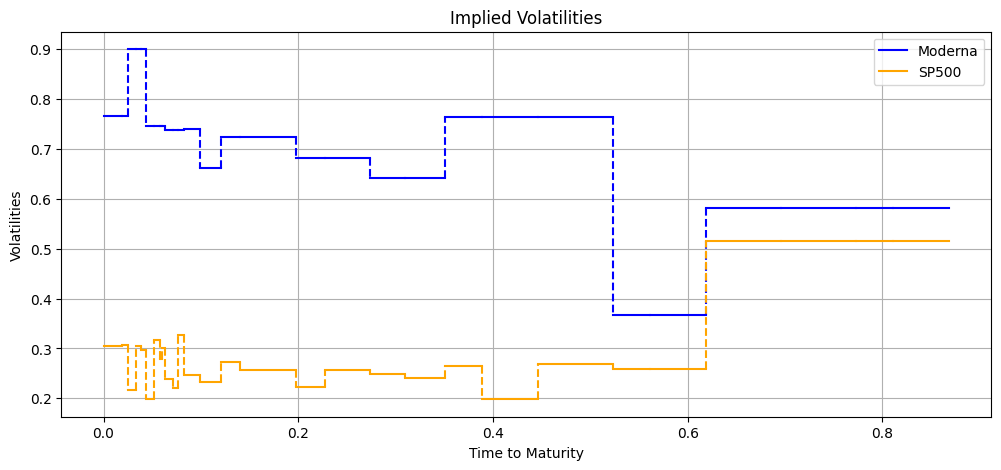

,Maturity,Moderna IV,SP500 IV
0,0.019178,0.767189,0.304656
1,0.024658,0.767189,0.307581
2,0.032877,0.900254,0.216518
3,0.038356,0.900254,0.304644
4,0.043836,0.900254,0.297142
5,0.052055,0.746459,0.199395
6,0.057534,0.746459,0.317569
7,0.060274,0.746459,0.278991
8,0.063014,0.746459,0.300477
9,0.071233,0.737439,0.238322


In [ ]:
def Task_2():
  def iv_compute(price, df, if_index):
    list_date_dat1 = sp500_quote[sp500_quote['Expiration Date'] > today + pd.DateOffset(days=6)]["Expiration Date"].unique()
    list_date_dat2 = mrna_quote[mrna_quote['Expiration Date'] > today + pd.DateOffset(days=6)]["Expiration Date"].unique()
    current_price = (price[price['Date'] == today]['Price'].values[0])

    if if_index == 'True':
      list_date = list_date_dat1
    else:
      list_date = list_date_dat2[list_date_dat2.isin(list_date_dat1)].unique()

    list_valid_date = []

    info_df = pd.DataFrame({'Call':[], 'Strike':[], 'Discount Factor':[], 'Dividend Factor':[]})

    for date in list_date:
      option_temp = df[(df["Expiration Date"] == date) & (df["Call Volume"] > 0) & (df["Put Volume"] > 0)]
      if (len(option_temp) > 0) and (date <= term_structure_day[-1]):
        list_valid_date.append(date)

    for date in list_valid_date:
      option_temp = df[(df["Expiration Date"] == date) & (df["Call Volume"] > 0) & (df["Put Volume"] > 0)].copy()
      T = year_transform(date)
      if if_index == 'True':
        forward_price = current_price * D_cal(T) / B_cal(T)
      else:
        forward_price = current_price / B_cal(T)
      option_temp['Moneyness'] = np.abs(option_temp['Strike'] - forward_price)
      atm_option = option_temp.loc[option_temp['Moneyness'].idxmin()]
      info_df = pd.concat([info_df, pd.DataFrame({
        'Call': [atm_option['Call Price']],
        'Strike': [atm_option['Strike']],
        'Discount Factor': [B_cal(T)],
        'Dividend Factor': [D_cal(T)]
      })], ignore_index=True)

    def target(iv):
      B = info_df["Discount Factor"].to_numpy(dtype=float)
      D = info_df["Dividend Factor"].to_numpy(dtype=float) if if_index == 'True' else np.ones(len(info_df))
      K = info_df["Strike"].to_numpy(dtype=float)
      call = info_df["Call"].to_numpy(dtype=float)

      logarg = (current_price * D) / (K * B)

      d_1 = (np.log(logarg) + 0.5 * iv) / np.sqrt(iv)
      d_2 = d_1 - np.sqrt(iv)

      price = D * current_price * norm.cdf(d_1) - K * B * norm.cdf(d_2)
      return call - price

    x0 =  0.002*np.ones(len(info_df))
    iv_cal = fsolve(target, x0=x0)

    # plt.figure(figsize=(12,5))
    # plt.plot(iv_cal)
    # plt.show()

    for i in range(1, len(iv_cal)):
      if iv_cal[i] < iv_cal[i-1]:
        iv_cal[i] = iv_cal[i-1]

    component_list = np.diff(iv_cal)
    component_list = np.insert(component_list, 0, iv_cal[0])

    t = [year_transform(x) for x in list_valid_date]
    t = [0] + t

    component = np.sqrt(component_list / np.diff(t))
    for i in range(len(component)):
      if component[i] == 0:
        component[i] = component[i-1]
      else:
        component[i] = component[i]
    return component, list_valid_date, info_df

  sp500_iv, sp500_date, sp500_info_df = iv_compute(sp500, sp500_quote, "True")
  mrna_iv, mrna_date, mrna_info_df = iv_compute(mrna, mrna_quote, "False")
  merged_date = sorted(set(sp500_date + mrna_date))

  df1 = pd.DataFrame({
        'Maturity': sp500_date,
        'Implied Volatility': sp500_iv
      })
  df2 = pd.DataFrame({
        'Maturity': mrna_date,
        'Implied Volatility': mrna_iv
      })
  table = pd.DataFrame({
        'Maturity': merged_date
      })

  table = table.merge(df2[['Maturity', 'Implied Volatility']], on='Maturity', how='left')
  table.rename(columns={'Implied Volatility': 'Moderna IV'}, inplace=True)
  table = table.merge(df1[['Maturity', 'Implied Volatility']], on='Maturity', how='left')
  table.rename(columns={'Implied Volatility': 'SP500 IV'}, inplace=True)
  table['Moderna IV'] = table['Moderna IV'].bfill()
  table = table.dropna(subset=['Moderna IV'])
  table['Maturity'] = [year_transform(x) for x in table['Maturity']]

  #calculate the integral from 0 to T of Vega squared dt
  #calculate the integral from 0 to T of Xi squared dt
  #calculate the integral from 0 to T of Vega x Xi squared dt
  #Take maturityT as parameter
  def variance_covariance(MaturityT, type="covariance"):
    if MaturityT > table['Maturity'].max(): # If MaturityT is higher than the latest date (out of data range) then raise error
      raise ValueError("Maturity must be before ", table['Maturity'].max())

    elif MaturityT == 0: # If MaturityT = 0 then return 0
      return 0

    elif type == "covariance":
        v = table['Moderna IV'].to_numpy(float) #S&P500
        xi = table['SP500 IV'].to_numpy(float) #MRNA
        T = table['Maturity'].to_numpy(float)
        if MaturityT < T[0]:
          return v[0] * xi[0] * MaturityT
        closest_T = T[T <= MaturityT].max() # Tn < MaturityT
        idx_closest_T = np.where(table['Maturity'] == closest_T)[0][0]  # index of closest_T
        result = np.array([])
        for i in range(len(T[T <= closest_T])):
            if i == 0:
                vxi = v[i] * xi[i] * T[i]
                result = np.append(result, vxi)
            else:
                vxi = v[i] * xi[i] * (T[i] - T[i-1])
                result = np.append(result, vxi)

        if MaturityT != T[-1]:
              result = np.append(
              result,
              table.loc[idx_closest_T + 1, 'Moderna IV']
              * table.loc[idx_closest_T +1 , 'SP500 IV']
              * (MaturityT - closest_T))
        else:
              result = np.append(
              result,
              table.loc[idx_closest_T, 'Moderna IV']
              * table.loc[idx_closest_T , 'SP500 IV']
              * (MaturityT - closest_T))

        result_ = np.sum(result)
        return result_

    elif type == "variance_index":
        v = table['Moderna IV'].to_numpy(float) #S&P500
        T = table['Maturity'].to_numpy(float)
        if MaturityT < T[0]:
          return v[0] ** 2 * MaturityT
        closest_T = T[T <= MaturityT].max() # Tn < MaturityT
        idx_closest_T = np.where(table['Maturity'] == closest_T)[0][0]  # index of closest_T
        result = np.array([])

        for i in range(len(T[T <= closest_T])):
            if i == 0:
                v_temp = (v[i] ** 2)  * T[i]
                result = np.append(result, v_temp)
            else:
                v_temp = (v[i] ** 2)  * (T[i] - T[i-1])
                result = np.append(result, v_temp)

        if MaturityT != T[-1]:
          result = np.append(
              result,
              (table.loc[idx_closest_T + 1, 'Moderna IV'] ** 2)
              * (MaturityT - closest_T))
        else:
          result = np.append(
              result,
              (table.loc[idx_closest_T, 'Moderna IV'] ** 2)
              * (MaturityT - closest_T))

        result_ = np.sum(result)
        return result_

    elif type == "variance_moderna":
        xi = table['SP500 IV'].to_numpy(float) #MRNA
        T = table['Maturity'].to_numpy(float)
        if MaturityT < T[0]:
          return xi[0] ** 2 * MaturityT
        closest_T = T[T <= MaturityT].max() # Tn < MaturityT
        idx_closest_T = np.where(table['Maturity'] == closest_T)[0][0]  # index of closest_T
        result = np.array([])

        for i in range(len(T[T <= closest_T])):
            if i == 0:
                xi_temp = (xi[i] ** 2)  * T[i]
                result = np.append(result, xi_temp)
            else:
                xi_temp = (xi[i] ** 2)  * (T[i] - T[i-1])
                result = np.append(result, xi_temp)

        if MaturityT != T[-1]:
          result = np.append(
              result,
              (table.loc[idx_closest_T + 1, 'SP500 IV'] ** 2)
              * (MaturityT - closest_T))
        else:
          result = np.append(
            result,
            (table.loc[idx_closest_T, 'SP500 IV'] ** 2)
            * (MaturityT - closest_T))

        result_ = np.sum(result)
        return result_

  plt.figure(figsize = (12, 5))
  for i in range(len(table)):
    if i == 0:
      plt.plot([0, table.loc[i, 'Maturity']], [table['Moderna IV'].iloc[i], table['Moderna IV'].iloc[i]], color = 'blue', label = 'Moderna')
      plt.plot([0, table.loc[i, 'Maturity']], [table['SP500 IV'].iloc[i], table['SP500 IV'].iloc[i]], color = 'orange', label = 'SP500')
    else:
      plt.plot([table.loc[i - 1, 'Maturity'], table.loc[i, 'Maturity']], [table['Moderna IV'].iloc[i], table['Moderna IV'].iloc[i]], color = 'blue')
      plt.plot([table.loc[i - 1, 'Maturity'], table.loc[i, 'Maturity']], [table['SP500 IV'].iloc[i], table['SP500 IV'].iloc[i]], color = 'orange')
    if i != len(table) - 1:
       plt.plot([table.loc[i, 'Maturity'], table.loc[i, 'Maturity']], [table['Moderna IV'].iloc[i], table['Moderna IV'].iloc[i+1]],  '--', color = 'blue')
       plt.plot([table.loc[i, 'Maturity'], table.loc[i, 'Maturity']], [table['SP500 IV'].iloc[i], table['SP500 IV'].iloc[i+1]],  '--', color = 'orange')
  plt.xlabel('Time to Maturity')
  plt.ylabel('Volatilities')
  plt.title('Implied Volatilities')
  plt.grid(True)
  plt.legend()
  plt.show()

  display(table)

  return table, variance_covariance

volatility_structure, cov_cal = Task_2()

# Task 3

In [ ]:
def Task_3():
  def year_transform(x):
    return (today - x).days / 365

  mrna_history = mrna[mrna['Date'] < today].copy()
  mrna_history.sort_values(by='Date', inplace=True) #sort from oldest to newest
  mrna_history = mrna_history.reset_index(drop=True)
  daily_logarithmic_returns_mrna = np.log(mrna_history['Price'] / mrna_history['Price'].shift(1))

  sp500_history = sp500[sp500['Date'] < today].copy()
  sp500_history.sort_values(by='Date', inplace=True) #sort from oldest to newest
  sp500_history = sp500_history.reset_index(drop=True)
  daily_logarithmic_returns_sp500 = np.log(sp500_history['Price'] / sp500_history['Price'].shift(1))

  correlation = daily_logarithmic_returns_mrna.cov(daily_logarithmic_returns_sp500)/(daily_logarithmic_returns_mrna.std()*daily_logarithmic_returns_sp500.std())

  mrna_history['Date'] = mrna_history['Date'].apply(lambda x: year_transform(x))
  sp500_history['Date'] = sp500_history['Date'].apply(lambda x: year_transform(x))

  print(f"Annualized Standard Deviation of Daily Logarithmic Returns for MRNA: {daily_logarithmic_returns_mrna.std()*np.sqrt(365)}")
  print(f"Annualized Standard Deviation of Daily Logarithmic Returns for SP500: {daily_logarithmic_returns_sp500.std()*np.sqrt(365)}")
  print(f"Annualized Covariance between Daily Logarithmic Returns of MRNA and SP500: {daily_logarithmic_returns_mrna.cov(daily_logarithmic_returns_sp500)*365}")
  print(f"Annualized Variance of Daily Logarithmic Returns for MRNA: {(daily_logarithmic_returns_mrna.std()*np.sqrt(365))**2}")
  print(f"Annualized Variance of Daily Logarithmic Returns for SP500: {(daily_logarithmic_returns_sp500.std()*np.sqrt(365))**2}")
  print(f"Correlation between Daily Logarithmic Returns of MRNA and SP500: {correlation}")

  return correlation

correlation_log_ret = Task_3()

Annualized Standard Deviation of Daily Logarithmic Returns for MRNA: 0.981740053206885
Annualized Standard Deviation of Daily Logarithmic Returns for SP500: 0.17158858830252613
Annualized Covariance between Daily Logarithmic Returns of MRNA and SP500: 0.03366555162428605
Annualized Variance of Daily Logarithmic Returns for MRNA: 0.9638135320706573
Annualized Variance of Daily Logarithmic Returns for SP500: 0.02944264363565381
Correlation between Daily Logarithmic Returns of MRNA and SP500: 0.1998484682638767


#**Task 4**

**Using Ito-Lemma, we have for Y:**

$$
\ln Y(t+\Delta t )-\ln Y(t)= \int_{t}^{t+\Delta t} \big(r(s) - \frac{1}{2} \eta(s)^\top\eta(s)\big)\,ds + \int_{t}^{t+\Delta t} \eta(s)^\top\,dW(s)
$$

$$
\ln Y(t+\Delta t )-\ln Y(t) \;\overset{\mathcal{F}_t}{\sim}\; \mathcal{N}\!
\left(
  \int_t^{t+\Delta t}\big(r(s)-\frac{1}{2}\eta(s)^\top\eta(s)\big)\,ds, \int_t^{t+\Delta t}\eta(s)^\top\eta(s)\,ds)
\right)
$$

Assumption 1: Assuming that $T_i \le t + \Delta t < T_{i+1}$. Then, we have:

$$
\sqrt{\ln Y (t+\Delta t) -\ln Y(t)|\mathcal{F_t}} = \sqrt{\int_t^{t+\Delta t}\eta(s)^\top\eta(s)\,ds} = \sqrt{\int_t^{t+\Delta t} \xi(s)^2\,ds} = \sqrt{\mathbb{p_i^2}(\Delta t)}
$$

Assuming that $T_i \le t < T_{i+1} \le t+\Delta t$. Then, we have:
$$
\sqrt{\text{Var}\big(\ln Y(t+\Delta t) - \ln Y(t)\big)|\mathcal{F_t}} = \sqrt{\int_t^{t+\Delta t} \eta(s)^\top\eta(s)\,ds} = \sqrt{\int_t^{T_{i+1}}\xi(s)^2\,ds + \int_{T_{i+1}}^{t+\Delta t}\xi(s)^2\,ds }
= \sqrt{\mathbb{p_i^2}(T_{i+1} - t) + \mathbb{p_{i+1}^2}(t+\Delta t - T_{i+1})}
$$

However, since we are only interested in daily changes, $t+\Delta t$ can't exceed $T_{i+1}$, so we can simply drop this assumption.

$\quad$

**Using Ito-Lemma, we have for X:**

$$
\ln X(t+\Delta t )-\ln X(t)= \int_{t}^{t+\Delta t} \big(r(s) - q(s) - \frac{1}{2} \sigma(s)^\top\sigma(s)\big)\,ds + \int_{t}^{t+\Delta t} \sigma(s)^\top\,dW(s)
$$

$$
\ln X(t+\Delta t )-\ln X(t) \;\overset{\mathcal{F}_t}{\sim}\; \mathcal{N}\!
\left(
  \int_t^{t+\Delta t}\big(r(s)-q(s)-\frac{1}{2}\sigma(s)^\top\sigma(s)\big)\,ds, \int_t^{t+\Delta t}\sigma(s)^\top\sigma(s)\,ds)
\right)
$$

Assuming that $T_i \le t + \Delta t < T_{i+1}$, we have:

$$
\sqrt{\ln X (t+\Delta t) -\ln X(t)|\mathcal{F_t}} = \sqrt{\int_t^{t+\Delta t}\sigma(s)^\top\sigma(s)\,ds} = \sqrt{\int_t^{t+\Delta t} \nu(s)^2\,ds} = \sqrt{\mathbb{c_i^2}(\Delta t)}
$$

Assuming that $T_i \le t < T_{i+1} \le t+\Delta t$, we have:
$$
\sqrt{\text{Var}\big(\ln X(t+\Delta t) - \ln X(t)\big)|\mathcal{F_t}} = \sqrt{\int_t^{t+\Delta t} \sigma(s)^\top\sigma(s)\,ds} = \sqrt{\int_t^{T_{i+1}}\nu(s)^2\,ds + \int_{T_{i+1}}^{t+\Delta t}\nu(s)^2\,ds }
= \sqrt{\mathbb{c_i^2}(T_{i+1} - t) + \mathbb{c_{i+1}^2}(t+\Delta t - T_{i+1})}
$$

Similarly, we can drop this assumption.

Thus,

$$\boxed{
\sqrt{\ln Y (t+\Delta t) -\ln Y(t)|\mathcal{F_t}} = \sqrt{\mathbb{p_i^2}(\Delta t)}}
$$

And

$$\boxed{
\sqrt{\ln X (t+\Delta t) -\ln X(t)|\mathcal{F_t}} = \sqrt{\mathbb{c_i^2}(\Delta t)}}
$$


# **Task 5**

We have:
$
\text{Var}\big[\ln X(t+\Delta t)Y(t+\Delta t)- \ln X(t)Y(t) | \mathcal{F_t}\big]
= \text{Var}\big[\ln X(t+\Delta t) - ln X(t) + \ln Y(t+\Delta t)- \ln Y(t)\big] | \mathcal{F_t}\big]
$

Since X and Y are NOT independent (Moderna is in SP500) and there is no information that X and Y are indentically distributed, we can conclude that:

$
\text{Var}\big[\ln X(t+\Delta t) - ln X(t) + \ln Y(t+\Delta t)- \ln Y(t)\big] | \mathcal{F_t}\big]
$

$$=\text{Var}\big[\ln X(t+\Delta t) -\ln X(t)\big]
+ \text{Var}\big[\ln Y(t+\Delta t) -\ln Y(t)\big]
+ 2 \text{Cov}\big[\ln X(t+\Delta t) -\ln X(t), \ln Y(t+\Delta t) -\ln Y(t)\big]
$$

Where the covariance is:

$
\text{Cov}\big[\ln X(t+\Delta t) -\ln X(t), \ln Y(t+\Delta t) -\ln Y(t)\big]
$

$
= \text{Cov} \big[\int_t^{T_{i+1}}\sigma(s)^\top\,dW(s) , \int_t^{T_{i+1}}\eta(s)^\top\,dW(s) \big]
$

$
= \int_t^{T_{i+1}} \sigma(s)^\top \eta(s)\,ds
$

$
= \int_t^{T_{i+1}} \nu(s) \xi(s)
\begin{pmatrix} \sigma_1 & 0 \end{pmatrix}\ \begin{pmatrix} \eta_1 \\ \eta_2 \end{pmatrix}\,ds
$

$
= \int_t^{T_{i+1}} \nu(s) \xi(s)\ \sigma_1 \eta_1\,ds
$

Assuming that $T_i \le t + \Delta t < T_{i+1}$, we have:

$$\boxed{
\text{Var}\big[\ln X(t+\Delta t) - \ln X(t) + \ln Y(t+\Delta t)- \ln Y(t)\big] | \mathcal{F_t}\big]
= (\mathbb{c_i^2} + \mathbb{p_i^2} + 2 \mathbb{c_i} \mathbb{p_i} \sigma_1 \eta_1)\Delta t
}
$$

We do not consider where $T_i \le t < T_{i+1} \le t+\Delta t$. However, just in case, the result for the assumption is as follows:

$$
\text{Var}\big[\ln X(t+\Delta t) - \ln X(t) + \ln Y(t+\Delta t)- \ln Y(t)\big] | \mathcal{F_t}\big] = (\mathbb{c_i^2} + \mathbb{p_i^2} + 2 \mathbb{c_i} \mathbb{p_i} \sigma_1 \eta_1) (T_{i+1}-t)
+ (\mathbb{c_{i+1}^2} + \mathbb{p_{i+1}^2} + 2 \mathbb{c_{i+1}} \mathbb{p_{i+1}} \sigma_1 \eta_1)
$$



# **Task 6**

Assuming that volatilities are constant in time such at $\nu(t)\equiv\ \hat{\nu}$ and $\xi(t) \equiv\ \hat{\xi}$.

From **Task 3**, we have calculated the correlation $\rho_{X,Y}$ of the daily logarithmic returns from the datasets. We will use this correlation $\rho_{X,Y}$ to determine the appropriate choices for the model parameters $\eta_1$ and $\eta_2$.

$$
\text{Corr} \Big[\ln \Big(\frac{\ln X(t+\Delta t)}{\ln X(t)}\Big) , \ln \Big(\frac{\ln Y(t+\Delta t)}{\ln Y(t)}\Big)\Big]
= \frac
{\text{Cov} \Big[\ln \Big(\frac{\ln X(t+\Delta t)}{\ln X(t)}\Big) , \ln \Big(\frac{\ln Y(t+\Delta t)}{\ln Y(t)}\Big)\Big]}
{{\sqrt{\text{Var}(\ln X(t+\Delta t) - \ln X(t))} \sqrt{\text{Var}(\ln X(t+\Delta t) - \ln X(t))}}}
$$

$$\Leftrightarrow
\text{Corr} \Big[\ln \Big(\frac{\ln X(t+\Delta t)}{\ln X(t)}\Big) , \ln \Big(\frac{\ln Y(t+\Delta t)}{\ln Y(t)}\Big)\Big]
= \frac
{\int_t^{t+\Delta t} \sigma(s)^\top \eta(s)\,ds}
{{\sqrt{\int_t^{t+\Delta t}\sigma(s)^\top \sigma(s)\,ds} \sqrt{\int_t^{t+\Delta t}\eta(s)^\top \eta(s)\,ds}}}
$$

$$\Leftrightarrow
\text{Corr} \Big[\ln \Big(\frac{\ln X(t+\Delta t)}{\ln X(t)}\Big) , \ln \Big(\frac{\ln Y(t+\Delta t)}{\ln Y(t)}\Big)\Big]
= \frac
{\hat{\nu}\sigma_1 \hat{\xi} \eta_1 \Delta t}
{{\sqrt{ \hat{\nu}^2 \Delta t} \sqrt{\hat{\xi}^2 \Delta t}}}
$$

$$\Leftrightarrow
\boxed{
\text{Corr} \Big[\ln \Big(\frac{\ln X(t+\Delta t)}{\ln X(t)}\Big) , \ln \Big(\frac{\ln Y(t+\Delta t)}{\ln Y(t)}\Big)\Big] = \sigma_1 \eta_1}
$$

In [ ]:
def Task_6():
  correlation = correlation_log_ret


SyntaxError: incomplete input (ipython-input-64316996.py, line 4)

# **Task 7**

An *underperformance* option on **Moderna Inc.** has payoff at time $T$:
$$
\text{Payoff} = \max(0,\, K X(T) - Y(T))
$$

The "fair" price at time $T_0$ (9 March 2022) of this option, which expires on 20 January 2023, is given by:

$$
C_{\text{moderna}}(0, X(0), Y(0))
= B(0,T)\,\mathbb{E}_{\mathbb{Q}}\!\left[(K X(T) - Y(T))^+\right]
$$


$$
= B(0,T)\,\mathbb{E}_{\mathbb{Q}}\!\left[(K X(T) - Y(T))\,\mathbf{1}_{\{Y(T)/X(T)<K\}}\right]
$$

---

Using Radon-Nikodym Derivative method for $X(T)$ to change measure from $\mathbb{Q}$ to $\tilde{\mathbb{Q}}$, we have:   

$$
\frac{d\tilde{\mathbb{Q}}}{d\mathbb{Q}}
= \frac{X(T)B(0,T)}{X(0)B(T,T)}\,\mathbf{C_1}
= D(0,T)\,
\exp\!\left\{
-\frac{1}{2}\!\int_0^T \sigma(s)^\top \sigma(s)\,ds
+ \int_0^T \sigma(s)^\top dW(s)
\right\} \mathbf{C_1}
$$

This is an exponential martingale when $\mathbf{C_1} = \frac{1}{D(0,T)}$.

Using **Girsanov**, we have the Brownian motion under $\tilde{\mathbb{Q}}$: $\quad$  $
d\tilde{W}(t) = dW(t) - \sigma(t)\,dt
$

Under $\tilde{\mathbb{Q}}$:

$$
\ln X(T)
= \ln\!\left(\frac{X(0)D(0,T)}{B(0,T)}\right)
+ \int_0^T \frac{1}{2} \sigma(s)^\top \sigma(s)\,ds
+ \int_0^T \sigma(s)^\top d\tilde{W}(s)
$$

$$
\ln Y(T)
= \ln\!\left(\frac{Y(0)}{B(0,T)}\right)
+ \int_0^T \left[\sigma(s)^\top \eta(s)
- \frac{1}{2}\eta(s)^\top \eta(s)\right]ds
+ \int_0^T \eta(s)^\top d\tilde{W}(s)
$$

Hence,

$$
\ln\!\frac{Y(T)}{X(T)}
= \ln\!\left(\frac{Y(0)}{X(0)D(0,T)}\right)
+ \int_0^T \!\Big[\sigma(s)^\top \eta(s)
- \frac{1}{2}\eta(s)^\top \eta(s)
- \frac{1}{2}\sigma(s)^\top \sigma(s)\Big]\,ds
+ \int_0^T (\eta(s)-\sigma(s))^\top d\tilde{W}(s)
$$

Thus,

$$
\ln\!\frac{Y(T)}{X(T)}
\;\overset{\tilde{\mathbb{Q}}|\mathbf{F_t}}{\sim}\;
\mathcal{N}\!\left(
\ln\!\left(\frac{Y(0)}{X(0)D(0,T)}\right)
+ \int_0^T [\sigma(s)^\top \eta(s)
- \frac{1}{2}\eta(s)^\top \eta(s)
- \frac{1}{2}\sigma(s)^\top \sigma(s)]\,ds,\;
\int_0^T \big[(\eta(s)-\sigma(s))^\top (\eta(s)-\sigma(s)\big]ds
\right)
$$

---

For Y(T), we use R-N to change measure from $\mathbb{Q}$ to $\hat{\mathbb{Q}}$:

$$
\frac{d\hat{\mathbb{Q}}}{d\mathbb{Q}} = \frac{Y(T)B(0,T)}{Y(0)} = \exp\left\{ -\frac{1}{2} \int_0^T \eta(s)^T \eta(s) \, ds + \int_0^T \eta(s)^\top \, dW(s) \right\}
$$

This is an **exponential martingale**.

Using Girsanov's theorem, we have $d\hat{W}(t) = dW(t)-\eta(t)\,dt$

$$
\ln X(T) = \ln\left( \frac{X(0)D(0,T)}{B(0,T)} \right) + \int_0^T \left[ \sigma(s)^\top \eta(t) - \frac{1}{2} \sigma(s)^\top \sigma(s) \right] ds + \int_0^T \sigma(s)^\top \, d\hat{W}(s)
$$

$$
\ln Y(T)
= \ln\left( \frac{Y(0)}{B(0,T)} \right)
+ \int_0^T \frac{1}{2} \eta(s)^\top \eta(s)\,ds
+ \int_0^T \eta(s)^\top\,d\hat{W}(s)
$$

$$
\ln \frac{Y(T)}{X(T)}
= \ln\left( \frac{Y(0)}{X(0)D(0,T)} \right)
+ \int_0^T \left[ \frac{1}{2} \eta(s)^\top \eta(s) - \sigma(s)^\top \eta(t) + \frac{1}{2} \sigma(s)^\top \sigma(s) \right]\,ds
+ \int_0^T (\eta(s) - \sigma(s))^\top \, d\hat{W}(s)
$$

$$
\ln \left( \frac{Y(T)}{X(T)} \right)\;\overset{\tilde{\mathbb{Q}}|\mathbf{F_t}}{\sim}\; \mathcal{N}\left( \ln\left( \frac{Y(0)}{X(0)D(0,T)} \right) + \int_0^T \left[ \frac{1}{2} \eta(s)^\top \eta(s) - \sigma(s)^\top \eta(s) + \frac{1}{2} \sigma(s)^\top \sigma(s) \right] ds,\ \int_0^T (\eta(s) - \sigma(s))^\top (\eta(s) - \sigma(s)) \, ds \right)
$$

Changing measure via the **numeraire technique**, we have the price of the "under-performing" Moderna option as:

$$
C_{\text{moderna}}(0, X(0), Y(0))
= D(0,T)\,K\,X(0)\,\mathbb{E}_{\tilde{\mathbb{Q}}}\!\left[\mathbf{1}_{\left\{\frac{Y(T)}{X(T)} < K\right\}}\right]
- Y(0)\,\mathbb{E}_{\hat{\mathbb{Q}}}\!\left[\mathbf{1}_{\left\{\frac{Y(T)}{X(T)} <K\right\}}\right]
$$

Finally,

$$\boxed{
C_{\text{moderna}}(0, X(0), Y(0))
= D(0,T)\,K X(0)\,\Phi(d_1)
- Y(0)\,\Phi(d_2)}
$$


$$\boxed{
d_1 = \frac{ \ln\left( \frac{K X(0) D(0,T)}{Y(0)} \right) + \frac{1}{2}\int_0^T \left[\eta(t)^\top \eta(t) -2\rho_{X,Y} \sigma(s)^\top \eta(t) + \sigma(s)^\top \sigma(s) \right] ds }{ \sqrt{ \int_0^T \left( \eta(s)^\top \eta(s) - 2 \sigma(s)^\top \eta(s) + \sigma(s)^\top \sigma(s) \right) ds }}}
$$


$$\boxed{
d_2 = \frac{ \ln\left( \frac{K X(0) D(0,T)}{Y(0)} \right) - \frac{1}{2}\int_0^T \left[\eta(t)^\top \eta(t) -2\rho_{X,Y} \sigma(s)^\top \eta(t)  + \sigma(s)^\top \sigma(s) \right] ds }{ \sqrt{ \int_0^T \left( \eta(s)^\top \eta(s) - 2 \sigma(s)^\top \eta(s) + \sigma(s)^\top \sigma(s) \right) ds }}}
$$

with $ \boxed{K = \frac{Y(0)}{X(0) D(0,T)}} $ , given that the "strike factor" $K$ is chosen such that at time $T_0$ (9 March 2022), the option is at-the-money based on forward prices.

In [ ]:
def Task_7():
    X = sp500[sp500['Date'] == today]['Price'].values[0]
    Y = mrna[mrna['Date'] == today]['Price'].values[0]
    maturity = pd.to_datetime("2023-01-20")
    delta_t = year_transform(maturity)
    K = Y / (X * D_cal(delta_t))
    vol_T = (cov_cal(delta_t, type = "variance_index")
              + cov_cal(delta_t, type = "variance_moderna")
              - 2 * cov_cal(delta_t, type = "covariance")
              * correlation_log_ret)
    d1 = (np.log((D_cal(delta_t) * K * X) / Y) + 0.5 * vol_T) / np.sqrt(vol_T)
    d2 = d1 - np.sqrt(vol_T)
    price = D_cal(delta_t) * K * X * norm.cdf(d1) - Y * norm.cdf(d2)
    return price

Task_7()

np.float64(35.7511344469142)

# **Task 8**

$$
\ln X(T) = \ln X(t) + \int_t^T \big[r(s) - q(s) - \frac{1}{2}\sigma(s)^\top\sigma(s)\big]\,ds + \int_t^T \sigma(s)^\top\,dW(s)
$$

$$
X(T) = X(t) exp \left\{
\int_t^T \big[ (r(s) - q(s) - \frac{1}{2}\sigma(s)^\top\sigma(s) \big]\,ds + \int_t^T \sigma(s)^\top\,dW(s)
\right\}
$$

$$
\ln Y(T) = \ln Y(t) + \int_t^T \big[r(s) - \frac{1}{2}\eta(s)^\top\eta(s)\big]\,ds + \int_t^T \eta(s)^\top\,dW(s)
$$

$$
Y(T) = Y(t) exp \left\{
\int_t^T \big[ r(s) - \frac{1}{2}\eta(s)^\top\eta(s) \big]\,ds + \int_t^T \eta(s)^\top\,dW(s)
\right\}
$$

We will  need to use log-linear interpolation of zero coupon prices and dividend discount factors obtained in **Task 1**, such that for $T_i \le T < T_{i+1}$, we have at time T (and analogously at time t)

$$
B(t,T) = \frac{B(0,T)}{B(0,t)} =
B(0,T_i)^{\frac{T-t}{T_{i+1}-T_i}} \cdot
B(0,T_{i+1})^{\frac{T-t}{T_{i+1}-T_i}}
$$

We have the under-performing Moderna option price at time $t < T$ is:

$$\boxed{
C_{\text{moderna}}(0, X(t), Y(t))
= D(t,T)\,K X(t)\,\Phi(d_1)
- Y(t)\,\Phi(d_2)}
$$


$$
\boxed{
d_1 = \frac{
\ln\left( \frac{K X(t) D(t,T)}{Y(t)} \right)
+ \frac{1}{2} \int_t^T \left[ \sigma(s)^\top \sigma(s)  - 2 \rho_{X,Y} \sigma(s)^\top \eta(t) + \eta(t)^\top \eta(t) \right] ds}
{\sqrt{ \int_t^T \left( \eta(s)^\top \eta(s) - 2\sigma(s)^\top \eta(s) + \sigma(s)^\top \sigma(s) \right) ds }}
}
$$


$$
\boxed{
d_2 = \frac{
\ln\left( \frac{K X(t) D(t,T)}{Y(t)} \right)
+ \frac{1}{2} \int_t^T \left[ \sigma(s)^\top \sigma(s)  - 2 \rho_{X,Y} \sigma(s)^\top \eta(t) + \eta(t)^\top \eta(t) \right] ds}{
\sqrt{ \int_0^T \left( \eta(s)^\top \eta(s) - 2\sigma(s)^\top \eta(s) + \sigma(s)^\top \sigma(s) \right) ds }
}
}
$$

By Ito-Lemma, we have the dynamics of the option price as:

$$
d C_{\text{moderna}} (t, X(t), Y(t)) =
\big[ D(t,T)\,K\,X(t)\Phi(d_1) -D(t,T)\,K\,X(t)\phi(d_1) \frac {\partial d_1}{\partial X(t)} - Y(t)\phi(d_2) \frac {\partial d_2}{\partial X(t)} \big]\,dX(t)
+ \big[ D(t,T) K X(t) \phi(d_1) \frac{\partial d_1}{\partial Y(t)} - \Phi(d_2) - Y(t)\,\Phi(d_2)\,\frac {\partial d_2}{\partial Y(t)} \big]\,dY(t)
+ \big[...\big]\,dt
$$

Which can be reduced to:

$$
d C_{\text{moderna}} (t, X(t), Y(t)) =
D(t,T)\,K\,X(t)\Phi(d_1)\,dX(t)
- \Phi(d_2)\,dY(t)
+ \big[...\big]\,dt
$$

The function of the self-financing replicating portfolio with daily rebalancing of the hedge can be defined as:

$$
V(t,X(t),Y(t)) = Q_1(t) X(t) + Q_2(t) Y(t) + Q_B(t) B(t,T)
$$

with $ Q_1(t) , Q_2(t) , Q_B(t)$ are quantities of SPX500 index, Morderna stock and the Zero Coupon Bond, respectively.


Where the dynamics of self-financing replicating portfolio is:

$$
dV(t,X(t),Y(t)) = Q_1(t) dX(t) + Q_2(t) dY(t) +  [...]dt
$$

The quantities of X and Y in the portfolio are as follows:

$$\boxed
{
Q_1(t) = D(t,T) K \Phi(d_1)
}
$$

$$\boxed
{
Q_2(t) = -\Phi(d_2)
}
$$

$$\boxed
{
Q_B(t) = \frac {C_{\text{moderna}} (t, X(t), Y(t)) - Q_1(t) X(t) - Q_2(t) Y(t)}{B(t,T)}
= 0
}
$$

The self-financing replicating portfolio that adjusts the hedge once per day is thus reduced to:

$$\boxed{
V(t,X(t),Y(t)) = Q_1(t) X(t) + Q_2(t) Y(t)}
$$


with $ \boxed{K = \frac{Y(0)}{X(0) D(0,T)}} $ , given that the "strike factor" $K$ is chosen such that at time $T_0$ (9 March 2022), the option is at-the-money based on forward prices.


In [ ]:
X = sp500[sp500['Date'] == today]['Price'].values[0]
Y = mrna[mrna['Date'] == today]['Price'].values[0]
maturity = pd.to_datetime("2023-01-20")
T = year_transform(maturity)
K = Y / (X * D_cal(T))
print(K)

0.03367798913941551


Profit and Loss from Hedging is  4.472563230364202


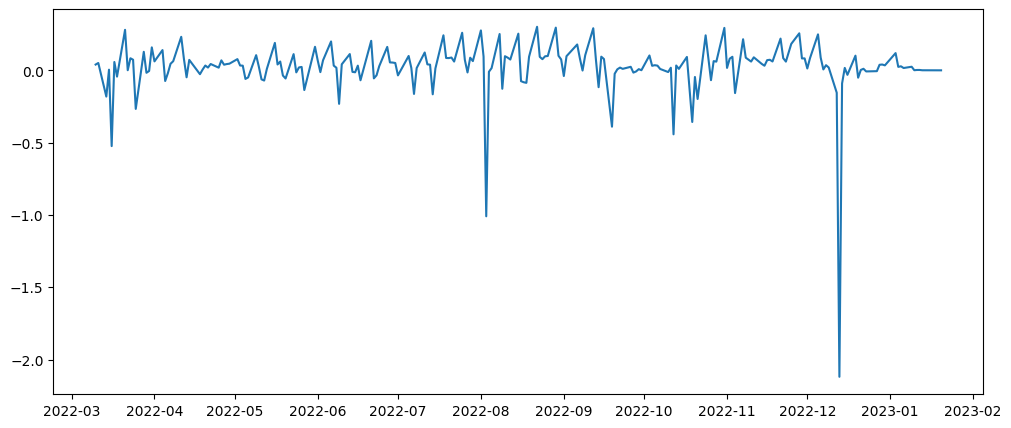

In [ ]:
def Task_8():
  X = sp500[sp500['Date'] == today]['Price'].values[0]
  Y = mrna[mrna['Date'] == today]['Price'].values[0]
  maturity = pd.to_datetime("2023-01-20")
  T = year_transform(maturity)
  K = Y / (X * D_cal(T))

  def delta_cal(x):
    t = year_transform(x)
    X_t = sp500[sp500['Date'] == x]['Price']
    Y_t = mrna[mrna['Date'] == x]['Price']
    vol_T = cov_cal(T, type = "variance_index") + cov_cal(T, type = "variance_moderna") - 2 * cov_cal(T, type = "covariance") * correlation_log_ret

    vol_t = cov_cal(t, type = "variance_index") + cov_cal(t, type = "variance_moderna") - 2 * cov_cal(t, type = "covariance") * correlation_log_ret
    vol = vol_T - vol_t
    D = D_cal(T) / D_cal(t)

    d1 = (np.log((D * K * X_t) / Y_t) + 0.5 * vol) / np.sqrt(vol)
    d2 = d1 - np.sqrt(vol)

    q1 = D * K * norm.cdf(d1)
    q2 = -norm.cdf(d2)
    return q1, q2

  list_date = mrna[(mrna['Date'] <= maturity) & (mrna['Date'] > today)]['Date'].values
  current_pos = delta_cal(today)

  daily_pnl = []
  T_pnl = []

  for t in list_date:
    X_t = sp500[sp500['Date'] == t]['Price']
    Y_t = mrna[mrna['Date'] == t]['Price']

    sell_price = current_pos[0] * X_t + current_pos[1] * Y_t
    if t < maturity:
      new_pos = delta_cal(t)
      buy_price = new_pos[0] * X_t + new_pos[1] * Y_t
      daily_pnl.append(sell_price - buy_price)
      B = B_cal(T) / B_cal(year_transform(t))
      T_pnl.append(daily_pnl[-1] / B)
      current_pos = new_pos
    else:
      buy_price = np.maximum(K * X_t - Y_t, 0)
      daily_pnl.append(sell_price - buy_price)
      T_pnl.append(daily_pnl[-1])
  print('Profit and Loss from Hedging is ', np.sum(T_pnl))

  plt.figure(figsize = (12, 5))
  plt.plot(list_date, daily_pnl)
  plt.show()

Task_8()

# **Task 9**

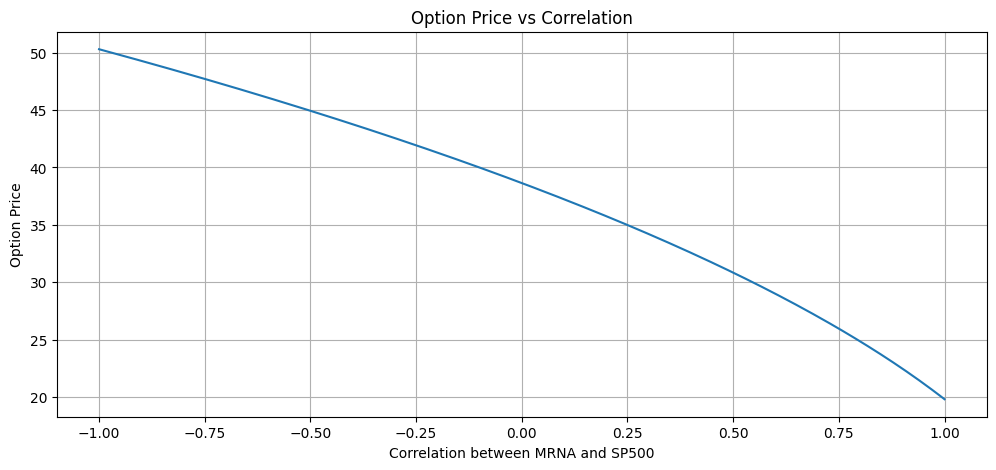

In [ ]:
# Instead of simulating eta from [-1, 1], from task 6, correlation is equal to eta times sigma
# Therefore instead of simulating eta, assume we fix sigma at 1 to simplify manipulation purpose
# We can simulate correlation from [-1,1], cut into n sizes, in this case n = 200
task9_corr_values = np.linspace(-1, 1, 200)

# Initate array of option prices
task9_option_prices = []

def Task_9(corr):
    # Follows the formula derived from task 7
    X = sp500[sp500['Date'] == today]['Price'].values[0] # same as task 7
    Y = mrna[mrna['Date'] == today]['Price'].values[0] # same as task 7
    maturity = pd.to_datetime("2023-01-20") # same as task 7
    delta_t = year_transform(maturity) # same as task 7
    K = Y / (X * D_cal(delta_t)) # same as task 7
    vol_T = (cov_cal(delta_t, type = "variance_index")
             + cov_cal(delta_t, type = "variance_moderna")
             - 2 * cov_cal(delta_t, type = "covariance")
             * corr) # The only exception from task 7 is that corr now varies within the band [-1,1]
    d1 = (np.log((D_cal(delta_t) * K * X) / Y) + 0.5 * vol_T) / np.sqrt(vol_T) # same as task 7
    d2 = d1 - np.sqrt(vol_T) # same as task 7
    price = D_cal(delta_t) * K * X * norm.cdf(d1) - Y * norm.cdf(d2) # same as task 7
    return price

# Append to the initiated array
for corr in task9_corr_values:
    task9_option_prices.append(Task_9(corr))

# Plotting corre against option price
plt.figure(figsize=(12, 5))
plt.plot(task9_corr_values, task9_option_prices)
plt.xlabel('Correlation between MRNA and SP500')
plt.ylabel('Option Price')
plt.title('Option Price vs Correlation')
plt.grid(True)
plt.show()

# **TO DELETE ON SUBMISSION**

In [ ]:
# def Task_2():
#   def iv_compute(price, df, if_index):
#     list_date_dat1 = sp500_quote[sp500_quote['Expiration Date'] > today + pd.DateOffset(days=6)]["Expiration Date"].unique()
#     list_date_dat2 = mrna_quote[mrna_quote['Expiration Date'] > today + pd.DateOffset(days=6)]["Expiration Date"].unique()
#     current_price = (price[price['Date'] == today]['Price'].values[0])

#     if if_index == 'True':
#       list_date = list_date_dat1
#     else:
#       list_date = list_date_dat2[list_date_dat2.isin(list_date_dat1)].unique()

#     list_valid_date = []

#     info_df = pd.DataFrame({'Call':[], 'Strike':[], 'Discount Factor':[], 'Dividend Factor':[]})

#     for date in list_date:
#       option_temp = df[(df["Expiration Date"] == date) & (df["Call Volume"] > 0) & (df["Put Volume"] > 0)]
#       if (len(option_temp) > 0) and (date <= term_structure_day[-1]):
#         list_valid_date.append(date)

#     for date in list_valid_date:
#       option_temp = df[(df["Expiration Date"] == date) & (df["Call Volume"] > 0) & (df["Put Volume"] > 0)].copy()
#       T = year_transform(date)
#       if if_index == 'True':
#         forward_price = current_price * D_cal(T) / B_cal(T)
#       else:
#         forward_price = current_price / B_cal(T)
#       option_temp['Moneyness'] = np.abs(option_temp['Strike'] - forward_price)
#       atm_option = option_temp.loc[option_temp['Moneyness'].idxmin()]
#       info_df = pd.concat([info_df, pd.DataFrame({
#         'Call': [atm_option['Call Price']],
#         'Strike': [atm_option['Strike']],
#         'Discount Factor': [B_cal(T)],
#         'Dividend Factor': [D_cal(T)]
#       })], ignore_index=True)

#     def target(iv):
#       B = info_df["Discount Factor"].to_numpy(dtype=float)
#       D = info_df["Dividend Factor"].to_numpy(dtype=float) if if_index == 'True' else np.ones(len(info_df))
#       K = info_df["Strike"].to_numpy(dtype=float)
#       call = info_df["Call"].to_numpy(dtype=float)

#       logarg = (current_price * D) / (K * B)

#       d_1 = (np.log(logarg) + 0.5 * iv) / np.sqrt(iv)
#       d_2 = d_1 - np.sqrt(iv)

#       price = D * current_price * norm.cdf(d_1) - K * B * norm.cdf(d_2)
#       return call - price

#     x0 =  0.002*np.ones(len(info_df))
#     iv_cal = fsolve(target, x0=x0)

#     # plt.figure(figsize=(12,5))
#     # plt.plot(iv_cal)
#     # plt.show()

#     for i in range(1, len(iv_cal)):
#       if iv_cal[i] < iv_cal[i-1]:
#         iv_cal[i] = iv_cal[i-1]

#     component_list = np.diff(iv_cal)
#     component_list = np.insert(component_list, 0, iv_cal[0])

#     t = [year_transform(x) for x in list_valid_date]
#     t = [0] + t

#     component = np.sqrt(component_list / np.diff(t))
#     return component, list_valid_date, info_df

#   sp500_iv, sp500_date, sp500_info_df = iv_compute(sp500, sp500_quote, "True")
#   mrna_iv, mrna_date, mrna_info_df = iv_compute(mrna, mrna_quote, "False")
#   merged_date = sorted(set(sp500_date + mrna_date))

#   df1 = pd.DataFrame({
#         'Maturity': sp500_date,
#         'Implied Volatility': sp500_iv
#       })
#   df2 = pd.DataFrame({
#         'Maturity': mrna_date,
#         'Implied Volatility': mrna_iv
#       })
#   table = pd.DataFrame({
#         'Maturity': merged_date
#       })

#   table = table.merge(df2[['Maturity', 'Implied Volatility']], on='Maturity', how='left')
#   table.rename(columns={'Implied Volatility': 'Moderna IV'}, inplace=True)
#   table = table.merge(df1[['Maturity', 'Implied Volatility']], on='Maturity', how='left')
#   table.rename(columns={'Implied Volatility': 'SP500 IV'}, inplace=True)
#   table['Moderna IV'] = table['Moderna IV'].bfill()
#   table = table.dropna(subset=['Moderna IV'])
#   table['Maturity'] = [year_transform(x) for x in table['Maturity']]

#   def variance_covariance(MaturityT, type="covariance"):
#     if MaturityT > table['Maturity'].max():
#       raise ValueError("Maturity must be before ", table['Maturity'].max())
#     elif MaturityT == 0:
#       return 0
#     elif type == "covariance":
#         v = table['Moderna IV'].to_numpy(float) #S&P500
#         xi = table['SP500 IV'].to_numpy(float) #MRNA
#         T = table['Maturity'].to_numpy(float)
#         if MaturityT < T[0]:
#           return v[0] * xi[0] * MaturityT
#         closest_T = T[T <= MaturityT].max() # Tn < MaturityT
#         idx_closest_T = np.where(table['Maturity'] == closest_T)[0][0]  # index of closest_T
#         result = np.array([])
#         for i in range(len(T[T <= closest_T])):
#             if i == 0:
#                 vxi = v[i] * xi[i] * T[i]
#                 result = np.append(result, vxi)
#             else:
#                 vxi = v[i] * xi[i] * (T[i] - T[i-1])
#                 result = np.append(result, vxi)

#         if MaturityT != T[-1]:
#               result = np.append(
#               result,
#               table.loc[idx_closest_T + 1, 'Moderna IV']
#               * table.loc[idx_closest_T +1 , 'SP500 IV']
#               * (MaturityT - closest_T))
#         else:
#               result = np.append(
#               result,
#               table.loc[idx_closest_T, 'Moderna IV']
#               * table.loc[idx_closest_T , 'SP500 IV']
#               * (MaturityT - closest_T))

#         result_ = np.sum(result)
#         return result_

#     elif type == "variance_index":
#         v = table['Moderna IV'].to_numpy(float) #S&P500
#         T = table['Maturity'].to_numpy(float)
#         if MaturityT < T[0]:
#           return v[0] ** 2 * MaturityT
#         closest_T = T[T <= MaturityT].max() # Tn < MaturityT
#         idx_closest_T = np.where(table['Maturity'] == closest_T)[0][0]  # index of closest_T
#         result = np.array([])

#         for i in range(len(T[T <= closest_T])):
#             if i == 0:
#                 v_temp = (v[i] ** 2)  * T[i]
#                 result = np.append(result, v_temp)
#             else:
#                 v_temp = (v[i] ** 2)  * (T[i] - T[i-1])
#                 result = np.append(result, v_temp)

#         if MaturityT != T[-1]:
#           result = np.append(
#               result,
#               (table.loc[idx_closest_T + 1, 'Moderna IV'] ** 2)
#               * (MaturityT - closest_T))
#         else:
#           result = np.append(
#               result,
#               (table.loc[idx_closest_T, 'Moderna IV'] ** 2)
#               * (MaturityT - closest_T))

#         result_ = np.sum(result)
#         return result_

#     elif type == "variance_moderna":
#         xi = table['SP500 IV'].to_numpy(float) #MRNA
#         T = table['Maturity'].to_numpy(float)
#         if MaturityT < T[0]:
#           return xi[0] ** 2 * MaturityT
#         closest_T = T[T <= MaturityT].max() # Tn < MaturityT
#         idx_closest_T = np.where(table['Maturity'] == closest_T)[0][0]  # index of closest_T
#         result = np.array([])

#         for i in range(len(T[T <= closest_T])):
#             if i == 0:
#                 xi_temp = (xi[i] ** 2)  * T[i]
#                 result = np.append(result, xi_temp)
#             else:
#                 xi_temp = (xi[i] ** 2)  * (T[i] - T[i-1])
#                 result = np.append(result, xi_temp)

#         if MaturityT != T[-1]:
#           result = np.append(
#               result,
#               (table.loc[idx_closest_T + 1, 'SP500 IV'] ** 2)
#               * (MaturityT - closest_T))
#         else:
#           result = np.append(
#             result,
#             (table.loc[idx_closest_T, 'SP500 IV'] ** 2)
#             * (MaturityT - closest_T))

#         result_ = np.sum(result)
#         return result_

#   plt.figure(figsize = (12, 5))
#   for i in range(len(table)):
#     if i == 0:
#       plt.plot([0, table.loc[i, 'Maturity']], [table['Moderna IV'].iloc[i], table['Moderna IV'].iloc[i]], color = 'blue', label = 'Moderna')
#       plt.plot([0, table.loc[i, 'Maturity']], [table['SP500 IV'].iloc[i], table['SP500 IV'].iloc[i]], color = 'orange', label = 'SP500')
#     else:
#       plt.plot([table.loc[i - 1, 'Maturity'], table.loc[i, 'Maturity']], [table['Moderna IV'].iloc[i], table['Moderna IV'].iloc[i]], color = 'blue')
#       plt.plot([table.loc[i - 1, 'Maturity'], table.loc[i, 'Maturity']], [table['SP500 IV'].iloc[i], table['SP500 IV'].iloc[i]], color = 'orange')
#     if i != len(table) - 1:
#        plt.plot([table.loc[i, 'Maturity'], table.loc[i, 'Maturity']], [table['Moderna IV'].iloc[i], table['Moderna IV'].iloc[i+1]],  '--', color = 'blue')
#        plt.plot([table.loc[i, 'Maturity'], table.loc[i, 'Maturity']], [table['SP500 IV'].iloc[i], table['SP500 IV'].iloc[i+1]],  '--', color = 'orange')
#   plt.xlabel('Time to Maturity')
#   plt.ylabel('Volatilities')
#   plt.title('Implied Volatilities')
#   plt.grid(True)
#   plt.legend()
#   plt.show()

#   display(table)

#   return table, variance_covariance

# volatility_structure, cov_cal = Task_2()